In [1]:
# suitable habitat
# two masks (daisy's)

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import seaborn as sns
import glob
import os
import fnmatch

In [39]:
# Generals
ldp = '/Users/sol/Documents/LargeData/QIN/' # data folder
months=['January','February','March','April','May','June','July','August','September','October','November','December']

# reginoal domain
ldom = np.array([[42, 48.5],[-130, -123]]) # 230, 237
# QIN domain
qbox = np.array([[-124.05,-124.33,-125.07,-124.774,-124.05],[46.53,47.4,47.4,46.53,46.53]]) 


In [43]:
qin = xr.open_dataset(ldp+'qin_mask.nc')
qin.close()
qin.coords['lon'] = np.mod(qin.coords['lon'] + 180,360) - 180
qin = qin.polygon_mask.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))
qin = qin.where(qin!=0,np.nan)

eez = xr.open_dataset(ldp+'eez_mask.nc')
eez.close()
eez.coords['lon'] = np.mod(eez.coords['lon'] + 180,360) - 180
eez = eez.region_mask.sel(lat=slice(ldom[0,0],ldom[0,1]),lon=slice(ldom[1,0],ldom[1,1]))
eez = eez.where(eez!=0,np.nan)

Xm, Ym = np.meshgrid(eez.lon,eez.lat)

In [41]:
#get bathymetry from ETOPO1
fn = ldp+'../Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fn)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

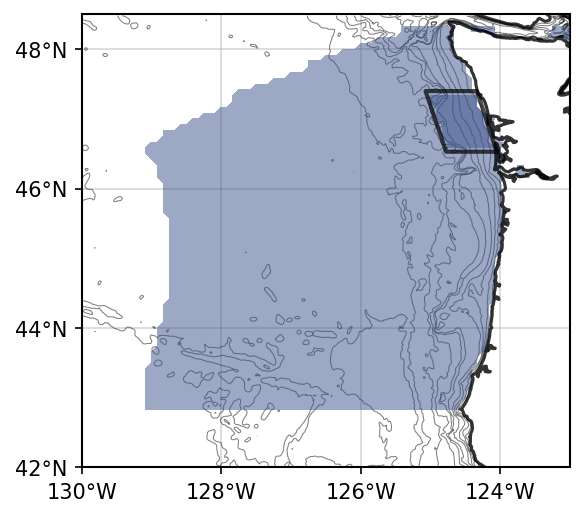

In [55]:
fig=plt.figure(figsize=(5,4),dpi=150)
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m',linewidth=1.5,color='black',alpha=0.8,zorder=4)
ax.set_extent([ldom[1,0],ldom[1,1],ldom[0,0],ldom[0,1]],crs=ccrs.PlateCarree())
ax.set_xticks([*range(-130,-123,2)], crs=ccrs.PlateCarree())
ax.set_yticks([*range(42,49,2)], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())
plt.grid(True, zorder=0,alpha=0.5)
#ax.set_aspect(1.5)
plt.contour(X,Y,topo2,[-5000,-3000,-2000,-1000,-500,-200,-150, -100,-75, -50,-25],colors='k',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.contourf(Xm,Ym,eez,c='tab:blue',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)
plt.contourf(Xm,Ym,qin,c='tab:red',linewidths=0.5, linestyles='solid', zorder=3, alpha=0.5)

plt.plot(qbox[0,:],qbox[1,:],c='k',lw=2,zorder=5, alpha=0.7)
plt.tight_layout(h_pad=1)
plt.show()

In [29]:

#eez.plot()
eez

<xarray.Dataset>
Dimensions:      (lat: 216, lon: 300, region: 1)
Coordinates:
  * region       (region) int64 2
  * lat          (lat) float64 31.0 31.08 31.17 31.25 ... 48.75 48.83 48.92
  * lon          (lon) float64 220.0 220.1 220.2 220.2 ... 244.8 244.8 244.9
Data variables:
    region_mask  (lat, lon) float64 ...
    geoname      object ...

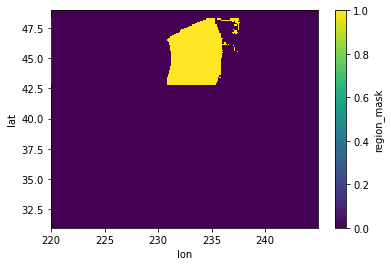

In [8]:
plot()

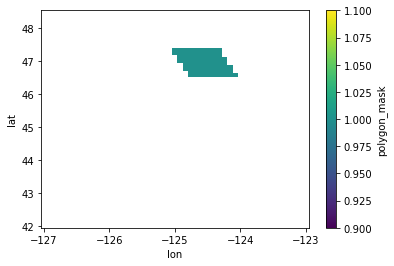

In [30]:


qin.plot()

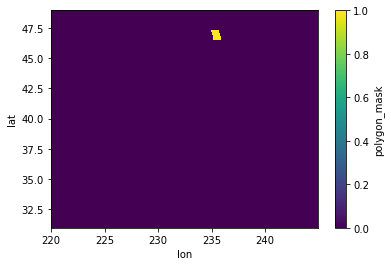

In [10]:
qin.polygon_mask.plot()